In [1]:
"""
Automating the calculation for how many coincidences we expect with given count rates
"""
A_rate = 7452
B_rate = 61883
AB_rate = 165

pulse_width = 8*10**(-9)
coincidence_window = pulse_width


accidentalRate = A_rate*B_rate*coincidence_window*2
alpha = AB_rate/accidentalRate

LaccidentalRate = A_rate*B_rate*coincidence_window
Lalpha = AB_rate/LaccidentalRate

print("Conservative Accidental Rate is: ", accidentalRate) #2*coincidence window
print("Conservative Anti-correlation is: ", alpha)
print("Liberal Accidental Rate is: ", LaccidentalRate)
print("Liberal Anti-correlation is: ", Lalpha)


Conservative Accidental Rate is:  7.378433856000001
Conservative Anti-correlation is:  22.36246922046
Liberal Accidental Rate is:  3.6892169280000005
Liberal Anti-correlation is:  44.72493844092


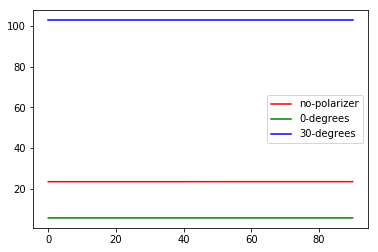

Standard deviation for no polarizer:  0.005
Standard deviation for 0 polarizer:  0.000916515138991
Standard deviation for 30 polarizer:  0.0


In [35]:
"""
Testing the polarization of our laser source:
Power fluctation as a function of time
"""
import scipy as sp
import matplotlib.pyplot as plt

#minute and a half in 10 second intervals
time = sp.linspace(0,90,10)

# in mW 
# note: moved from 12.0 to 12.3V on power supply
powerWithoutPolarizer = sp.array([23.43, 23.43, 23.43, 23.43, 23.43, 23.44, 23.44, 23.44, 23.44, 23.44])

#in mW
#at 0 degrees
powerWithPolarizer0 = sp.array([5.618, 5.617, 5.618, 5.618, 5.618, 5.619, 5.619, 5.620, 5.619, 5.620])

#in microW
#at 30 degrees
powerWithPolarizer30 = sp.array([102.8, 102.8, 102.8, 102.8, 102.8, 102.8, 102.8, 102.8, 102.8, 102.8])

plt.plot(time,powerWithoutPolarizer, color='r', label="no-polarizer")
plt.plot(time,powerWithPolarizer0, color='g', label="0-degrees")
plt.plot(time,powerWithPolarizer30, color='b', label="30-degrees")
plt.legend()
plt.show()

print('Standard deviation for no polarizer: ', sp.std(powerWithoutPolarizer))
print('Standard deviation for 0 polarizer: ', sp.std(powerWithPolarizer0))
print('Standard deviation for 30 polarizer: ', sp.std(powerWithPolarizer30))




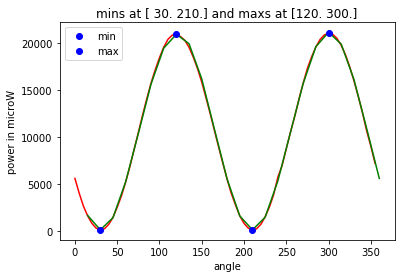

minimum of  [102.5 106.6]  at angle  [ 30. 210.]
maximum of  [20970. 21090.]  at angle  [120. 300.]


In [3]:
"""
Testing the polarization of our laser source:
Power fluctation as a function of angle
"""
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#room noise is at 380nW

#minute and a half in 10 second intervals
angle = sp.linspace(0,355,72)

#in microW
power = sp.array([5600, 4035, 2654, 1614, 814.4, 295.8, 102.5, 229.4, 694.7, 1432, 2518, 3720, 5200, 6847, 8686,
                  10490, 12340, 14100, 15760, 17190, 18470, 19590, 20430, 20870, 20970, 20720, 20330, 19580,
                  18530, 17310, 15870, 14210, 12510, 10710, 8940, 7197, 5514, 3978, 2750, 1598, 798.5, 298.4,
                  106.6, 230.6, 706.2, 1502, 2533, 3837, 5721, 6946, 8764, 10550, 12210, 14070, 15760, 17350,
                  18570, 19620, 20420, 20900, 21090, 20970, 20530, 19790, 18790, 17510, 16020, 14390, 12640,
                  10700, 9040, 7203
                 ])

#note: laswer went to 12.4V
angleBackwards = sp.linspace(360, 15, 24)
powerBackwards = sp.array([5600, 10950, 16160, 19920, 21190, 19650, 15730, 10530, 5321, 1455, 108.1, 1590, 5535,
                           10850, 16220, 19960, 20980, 19490, 15650, 10390, 5233, 1404, 106.6, 1656])

# min and max from points
a = sp.diff(sp.sign(sp.diff(power))).nonzero()[0] + 1 # local min+max
b = (sp.diff(sp.sign(sp.diff(power))) > 0).nonzero()[0] + 1 # local min
c = (sp.diff(sp.sign(sp.diff(power))) < 0).nonzero()[0] + 1 # local max

polynomialFactors = (sp.polyfit(angle,power,3))
def f(x,a1,b1,c1,d1,e1,f1):
    return a1*x**(5)+b1*x**(4)+c1*x**(3)+d1*x**(2)+e1*x+f1
a2,b2,c2,d2,e2,f2 = curve_fit(f,angle,power)[0]
#print(curve_fit(f,angle,power))
#plt.plot(angle,f(angle,a2,b2,c2,d2,e2,f2))


plt.plot(angle,power, color='r')
plt.plot(angleBackwards, powerBackwards, color="g")
plt.plot(angle[b], power[b], "o", color='b', label="min")
plt.plot(angle[c], power[c], "o", color='b', label="max")
plt.xlabel('angle')
plt.ylabel('power in microW')
plt.title("mins at %s"%(angle[b]) + " and maxs at %s"%(angle[c]))
plt.legend()
plt.savefig('Power_fluctation_as_a_function_of_angle.png')
plt.show()

print("minimum of ", power[b], " at angle ", angle[b])
print("maximum of ", power[c], " at angle ", angle[c])



In [ ]:
import scipy as sp
import matplotlib.pyplot as plt

angle1 = sp.linspace(0,-6,20)
angle2 = sp.linspace(0,6,20)

counts1 = [2700, 7400, 6500, 5500, 4800, 4850, 4800]

count2 = [2600, 1400, 1600, 0,0, 1400, 1100, 1300, 1200]

In [57]:
##Hanbury Brown Twiss Data Analysis
# 25 runs! at 5secs each run
import scipy as sp

## DATA ENTRY
PULSE_WIDTH = 8*10**(-9) #8ns
A = [101116, 101465, 100958, 101338, 101583, 101325, 100483, 101413, 101417, 101134, 101843, 101584, 101375, 100602, 101188, 101075, 101593, 101258, 100985, 101541, 101816, 101279, 100746, 101602, 101572]
B = [72874, 72690, 72814, 72826, 73334, 73051, 72466, 72877, 73095, 72562, 72615, 72810, 72573, 72713, 72674, 73007, 72591, 72511, 73067, 72001, 72897, 73088, 72641, 72970, 73068]
G = [355640, 348521, 347131, 348756, 347451, 347927, 348000, 348094, 348189, 348703, 348748, 348949, 348155, 347584, 348012, 347235, 348167, 347140, 348442, 347944, 348517, 347180, 347214, 347529, 347332]
coincidence_AB = [11, 17, 14, 12, 14, 18, 14, 18, 10, 13, 5, 21, 14, 13, 18, 7, 13, 16, 11, 10, 16, 12, 8, 11, 22]
coincidence_AG = [7115, 7161, 7116, 7167, 7239, 7172, 7052, 7263, 7256, 7140, 7195, 7283, 7318, 7004, 7113, 7190, 7296, 7156, 7177, 7421, 7144, 7185, 7177, 7167, 7219]
coincidence_BG = [7010, 7017, 7156, 7053, 7202, 7010, 7089, 7177, 7151, 7009, 7087, 7003, 7079, 7089, 7071, 7081, 7117, 7059, 7156, 6956, 7117, 7229, 7116, 7120, 7018]
coincidence_ABG = [2, 0, 3, 2, 1, 4, 2, 4, 3, 0, 1, 3, 4, 0, 3, 0, 1, 0, 2, 0, 3, 1, 2, 0, 5]
runs = len(A)


## GENERATE CALCULATED VALUES
# first index is the trial # (from 0 to 24), the second index is AB==0, AG==1, BG==2, ABG==3
accidentals = []
anti_correlations = []
for i in range(0,runs):
    accidentals.append([])
    accidentals[i].append(A[i]*B[i]*PULSE_WIDTH*2) ##using pulsewidth*2 here just to err on the side of caution, our system actually uses pulsewidth*1
    accidentals[i].append(A[i]*G[i]*PULSE_WIDTH*2)
    accidentals[i].append(B[i]*G[i]*PULSE_WIDTH*2 )
    accidentals[i].append((coincidence_AB[i]*G[i] + coincidence_AG[i]*B[i])*PULSE_WIDTH*2) ##triple accidental

    anti_correlations.append([])
    anti_correlations[i].append(coincidence_AB[i]/accidentals[i][0])
    anti_correlations[i].append(coincidence_AG[i]/accidentals[i][1])
    anti_correlations[i].append(coincidence_BG[i]/accidentals[i][2])
    anti_correlations[i].append((coincidence_ABG[i]/(coincidence_AG[i]*coincidence_BG[i]))*G[i]) #triple anti-correlation

## AVERAGE CALCULATED VALUES
# indexed by AB=0, AG=1, BG=2, ABG=3
avgAccidentals = []
avgAC = []
for j in range(0,4):
    totalAccidentals = 0
    totalAC = 0
    totalCounts = 0
    for n in range(0,runs): #average over all runs
        totalAccidentals += accidentals[n][j]
        totalAC += anti_correlations[n][j]
    avgAccidentals.append((totalAccidentals/(runs)))
    avgAC.append((totalAC/(runs)))

print()
print("Mean of A:", sp.mean(A), ", standard deviation:", sp.std(A), ", std as percent:", (100/sp.mean(A))*sp.std(A))
print("Mean of B:", sp.mean(B), ", standard deviation: ", sp.std(B), ", std as percent:", (100/sp.mean(B))*sp.std(B))
print("Mean of Gate:", sp.mean(G), ", standard deviation: ", sp.std(G), ", std as percent:", (100/sp.mean(G))*sp.std(G))
print("Mean of coincidence_AB:", sp.mean(coincidence_AB))
print("Mean of coincidence_AG:", sp.mean(coincidence_AG), ", standard deviation: ", sp.std(coincidence_AG), ", std as percent:", (100/sp.mean(coincidence_AG))*sp.std(coincidence_AG))
print("Mean of coincidence_BG:", sp.mean(coincidence_BG))
print("Mean of coincidence_ABG:", sp.mean(coincidence_ABG))

print()
print("Average accidental rate of AB:", avgAccidentals[0])
print("Average accidental rate of AG:", avgAccidentals[1])
print("Average accidental rate of BG:", avgAccidentals[2])
print("Average accidental rate of ABG:", avgAccidentals[3])
print()
print("Average anti-correlation factor of AB:", avgAC[0])
print("Average anti-correlation factor of AG:", avgAC[1])
print("Average anti-correlation factor of BG:", avgAC[2])
print("Average anti-correlation factor of ABG:", avgAC[3])


Mean of A: 101291.64 , standard deviation: 340.30467290356154 , std as percent: 0.3359652118413341
Mean of B: 72792.6 , standard deviation:  270.83485743160907 , std as percent: 0.37206372272952065
Mean of Gate: 348262.4 , standard deviation:  1606.56134647887 , std as percent: 0.46130772270531356
Mean of coincidence_AB: 13.52
Mean of coincidence_AG: 7189.04 , standard deviation:  85.2260429680975 , std as percent: 1.1854996351125813
Mean of coincidence_BG: 7086.88
Mean of coincidence_ABG: 1.84

Average accidental rate of AB: 117.97271418816003
Average accidental rate of AG: 564.4173038419199
Average accidental rate of BG: 405.61475599615994
Average accidental rate of ABG: 8.448203312000002

Average anti-correlation factor of AB: 0.11457052473663847
Average anti-correlation factor of AG: 12.73728715781935
Average anti-correlation factor of BG: 17.472477115302244
Average anti-correlation factor of ABG: 0.012560978948803939


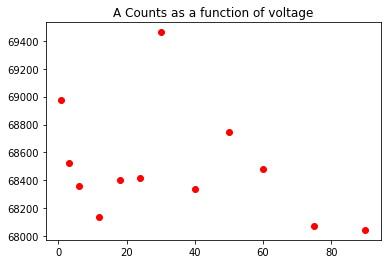

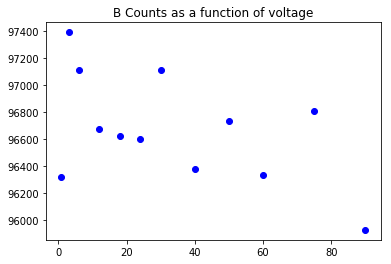

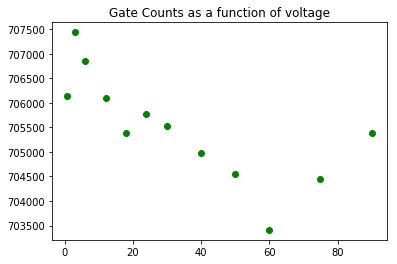

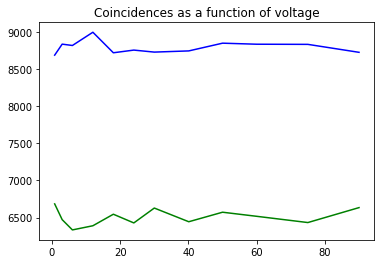

In [67]:
##Single Photon Interference Data Analysis Try 1
# 
import matplotlib.pyplot as plt


voltage = [0.8, 3, 6, 12, 18, 24, 30, 40.1, 50, 60, 75, 90]
A = [68974, 68523, 68359, 68140, 68402, 68414, 69462, 68341, 68747, 68482, 68075, 68044]
B = [96320, 97390, 97107, 96672, 96618, 96597, 97107, 96374, 96730, 96330, 96807, 95926]
G = [706149, 707440, 706854, 706093, 705379, 705781, 705520, 704981, 704547, 703410, 704449, 705389]
AB = [5, 7, 8, 3, 6, 5, 3, 6, 9, 2, 5, 5]
AG = [6685, 6473, 6335, 6391, 6546, 6429, 6629, 6445, 6573, 6518, 6434, 6635]
BG = [8685, 8833, 8815, 8993, 8717, 8753, 8726, 8742, 8846, 8832, 8830, 8723]
ABG = [0, 4, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]


plt.scatter(voltage, A, color='r')
plt.title("A Counts as a function of voltage")
plt.show()
plt.scatter(voltage, B, color='b')
plt.title("B Counts as a function of voltage")
plt.show()
plt.scatter(voltage, G, color='g')
plt.title("Gate Counts as a function of voltage")
plt.show()

#plt.scatter(voltage, AB, color='r')
plt.plot(voltage, AG, color='g')
plt.plot(voltage, BG, color='b')
#plt.scatter(voltage, ABG, color='y')
plt.title("Coincidences as a function of voltage")
plt.show()

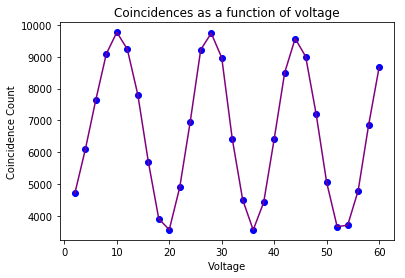

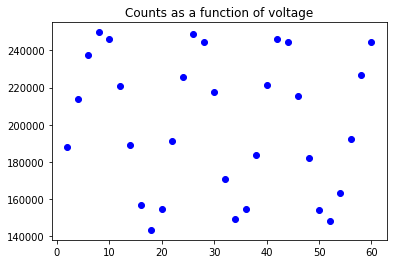

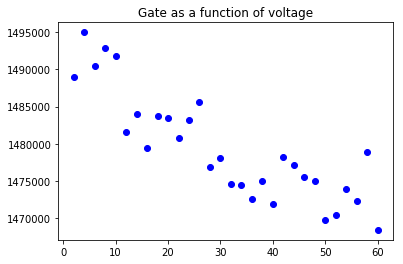

Mean of G: 1479478.4 , standard deviation: 7053.640424631808 , std as percent: 0.476765353561891
Mean of A: 200812.9 , standard deviation: 36222.24836786548 , std as percent: 18.037809507190765
Mean of AG: 6654.966666666666 , standard deviation: 2134.501822960623 , std as percent: 32.07381689305666
minimum of A:  [143311 148951 148210]  at voltage  [18 34 52]
maximum of A:  [249832 248628 246392]  at voltage  [ 8 26 42]
minimum of AG:  [3560 3553 3657]  at voltage  [20 36 52]
maximum of AG:  [9775 9744 9578]  at voltage  [10 28 44]


In [6]:
##Single Photon Interference Data Analysis Try 1
# 25 second data points
import matplotlib.pyplot as plt
import scipy as sp


voltage = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60]
A = [187816, 213862, 237467, 249832, 245978, 220717, 189073, 156881, 143311, 154668, 191212, 225870, 248628, 244673, 217874, 170686, 148951, 154385, 183569, 221573, 246392, 244773, 215600, 181804, 153923, 148210, 163234, 192090, 226714, 244621]
G = [1489005, 1494975, 1490407, 1492824, 1491760, 1481614, 1484048, 1479506, 1483755, 1483432, 1480732, 1483163, 1485581, 1476840, 1478047, 1474597, 1474445, 1472653, 1475013, 1471969, 1478277, 1477220, 1475525, 1475042, 1469812, 1470460, 1473948, 1472308, 1478942, 1468452]
AG = [4703, 6088, 7648, 9092, 9775, 9242, 7813, 5706, 3902, 3560, 4897, 6965, 9227, 9744, 8975, 6427, 4497, 3553, 4421, 6414, 8503, 9578, 9009, 7198, 5050, 3657, 3699, 4784, 6853, 8669]
runs = len(A)

#plt.scatter(voltage, AB, color='r')
plt.scatter(voltage, AG, color='blue')
plt.plot(voltage, AG, color='purple')
plt.title("Coincidences as a function of voltage")
plt.xlabel("Voltage")
plt.ylabel("Coincidence Count")
plt.show()

plt.scatter(voltage, A, color='b')
plt.title("Counts as a function of voltage")
plt.show()
plt.scatter(voltage, G, color='b')
plt.title("Gate as a function of voltage")
plt.show()

print("Mean of G:", sp.mean(G), ", standard deviation:", sp.std(G), ", std as percent:", (100/sp.mean(G))*sp.std(G))
print("Mean of A:", sp.mean(A), ", standard deviation:", sp.std(A), ", std as percent:", (100/sp.mean(A))*sp.std(A))
print("Mean of AG:", sp.mean(AG), ", standard deviation:", sp.std(AG), ", std as percent:", (100/sp.mean(AG))*sp.std(AG))


def minMax(stuff):
    a = sp.diff(sp.sign(sp.diff(stuff))).nonzero()[0] + 1 # local min+max
    b = (sp.diff(sp.sign(sp.diff(stuff))) > 0).nonzero()[0] + 1 # local min
    c = (sp.diff(sp.sign(sp.diff(stuff))) < 0).nonzero()[0] + 1 # local max
    return a,b,c

a,b,c = minMax(A)
A = sp.array(A)
voltage = sp.array(voltage)
#print(a,b,c)
print("minimum of A: ", A[b], " at voltage ", voltage[b])
print("maximum of A: ", A[c], " at voltage ", voltage[c])

a,b,c = minMax(AG)
AG = sp.array(AG)
voltage = sp.array(voltage)
#print(a,b,c)
print("minimum of AG: ", AG[b], " at voltage ", voltage[b])
print("maximum of AG: ", AG[c], " at voltage ", voltage[c])

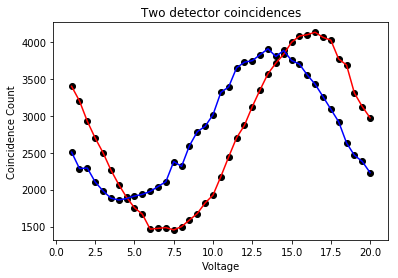

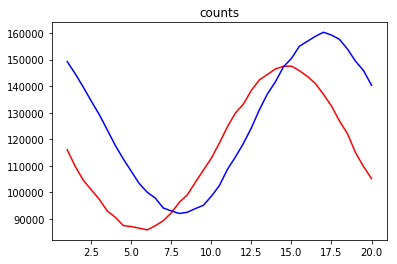

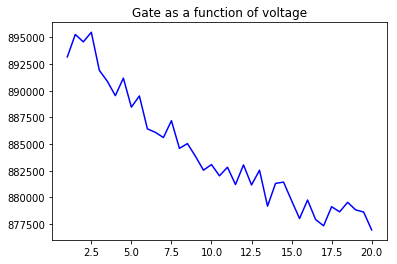

Mean of G: 884191.5897435897 , standard deviation: 5348.00896916355 , std as percent: 0.6048473013314276
Mean of A: 115435.02564102564 , standard deviation: 20923.88012196392 , std as percent: 18.126110342827843
Mean of AG: 2763.974358974359 , standard deviation: 919.0503595805302 , std as percent: 33.251045061125915
minimum of A:  [85910]  at voltage  [6.]
maximum of A:  [147578]  at voltage  [15.]
minimum of AG:  [1466 1455]  at voltage  [6.  7.5]
maximum of AG:  [1486 4130]  at voltage  [ 7.  16.5]
minimum of B:  [92092]  at voltage  [8.]
maximum of B:  [160306]  at voltage  [17.]
minimum of BG:  [144721 117767  92092 141640]  at voltage  [ 1.5  4.   8.  14. ]
maximum of BG:  [139709  93071 137093 147283]  at voltage  [ 2.   7.5 13.5 14.5]


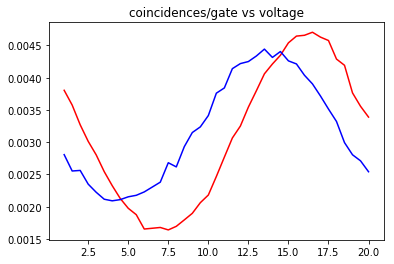

In [5]:
##Single Photon Interference Data Analysis Try 2
# 15 second data points
import matplotlib.pyplot as plt
import scipy as sp


voltage = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0 , 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]
A = [116107, 109866, 104680, 101043, 97464, 93064, 90701, 87558, 87164, 86575, 85910, 87488, 89362, 92335, 96286, 99079, 103813, 108368, 112904, 118579, 124703, 129904, 133252, 138479, 142393, 144396, 146498, 147473, 147578, 145835, 143654, 140985, 136935, 132515, 126916, 122111, 115011, 109771, 105211, ]
B = [149297, 144721, 139709, 134432, 129361, 123603, 117767, 112656, 107989, 103357, 100074, 97904, 94153, 93071, 92092, 92556, 93926, 95155, 98560, 102570, 108640, 113338, 118429, 124323, 131119, 137093, 141640, 147283, 150441, 155066, 156920, 158792, 160306, 159247, 157619, 153965, 149404, 145881, 140347, ]
G = [893164, 895269, 894573, 895477, 891905, 890878, 889535, 891173, 888460, 889503, 886423, 886092, 885608, 887184, 884593, 885039, 883853, 882548, 883074, 882019, 882825, 881200, 883042, 881164, 882540, 879174, 881308, 881430, 879698, 878017, 879751, 877922, 877335, 879121, 878643, 879534, 878827, 878623, 876948, ]
AB = [12, 8, 10, 8, 5, 5, 6, 6, 5, 5, 4, 5, 9, 5, 5, 8, 3, 6, 3, 8, 17, 8, 9, 12, 13, 14, 12, 8, 7, 12, 15, 15, 14, 13, 5, 12, 6, 7, 6, ]
AG = [3398, 3201, 2925, 2698, 2500, 2266, 2069, 1896, 1755, 1669, 1466, 1476, 1486, 1455, 1500, 1589, 1677, 1820, 1926, 2177, 2444, 2701, 2870, 3123, 3352, 3569, 3712, 3832, 3994, 4078, 4097, 4130, 4061, 4023, 3768, 3687, 3308, 3125, 2972, ]
BG = [2507, 2286, 2292, 2104, 1983, 1885, 1860, 1880, 1913, 1936, 1976, 2042, 2108, 2379, 2315, 2594, 2784, 2857, 3014, 3316, 3391, 3648, 3725, 3745, 3827, 3906, 3802, 3883, 3748, 3699, 3552, 3427, 3260, 3089, 2918, 2633, 2465, 2382, 2229, ]
ABG =[0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, ]
runs = len(A)

#plt.scatter(voltage, AB, color='r')
plt.scatter(voltage, AG, color='black')
plt.scatter(voltage, BG, color='black')
plt.plot(voltage, AG, color='r')
plt.plot(voltage, BG, color='b')
plt.title("Two detector coincidences")
plt.xlabel("Voltage")
plt.ylabel("Coincidence Count")
plt.show()

plt.plot(voltage, A, color='r')
plt.plot(voltage, B, color='b')
plt.title("counts")
plt.show()

plt.plot(voltage, G, color='b')
plt.title("Gate as a function of voltage")
plt.show()

print("Mean of G:", sp.mean(G), ", standard deviation:", sp.std(G), ", std as percent:", (100/sp.mean(G))*sp.std(G))
print("Mean of A:", sp.mean(A), ", standard deviation:", sp.std(A), ", std as percent:", (100/sp.mean(A))*sp.std(A))
print("Mean of AG:", sp.mean(AG), ", standard deviation:", sp.std(AG), ", std as percent:", (100/sp.mean(AG))*sp.std(AG))


def minMax(stuff):
    a = sp.diff(sp.sign(sp.diff(stuff))).nonzero()[0] + 1 # local min+max
    b = (sp.diff(sp.sign(sp.diff(stuff))) > 0).nonzero()[0] + 1 # local min
    c = (sp.diff(sp.sign(sp.diff(stuff))) < 0).nonzero()[0] + 1 # local max
    return a,b,c

a,b,c = minMax(A)
A = sp.array(A)
voltage = sp.array(voltage)
print("minimum of A: ", A[b], " at voltage ", voltage[b])
print("maximum of A: ", A[c], " at voltage ", voltage[c])

AG = sp.array(AG)
a,b,c = minMax(AG)
print("minimum of AG: ", AG[b], " at voltage ", voltage[b])
print("maximum of AG: ", AG[c], " at voltage ", voltage[c])

B = sp.array(B)
a,b,c = minMax(B)
print("minimum of B: ", B[b], " at voltage ", voltage[b])
print("maximum of B: ", B[c], " at voltage ", voltage[c])

BG = sp.array(BG)
a,b,c = minMax(BG)
print("minimum of BG: ", B[b], " at voltage ", voltage[b])
print("maximum of BG: ", B[c], " at voltage ", voltage[c])


#plt.scatter(voltage, AB, color='r')
plt.plot(voltage, AG/G, color='r')
plt.plot(voltage, BG/G, color='b')
plt.title("coincidences/gate vs voltage")
plt.show()

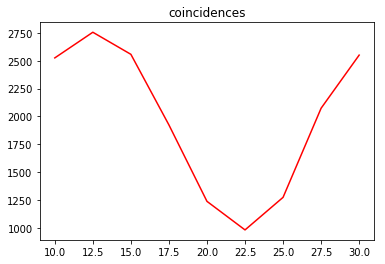

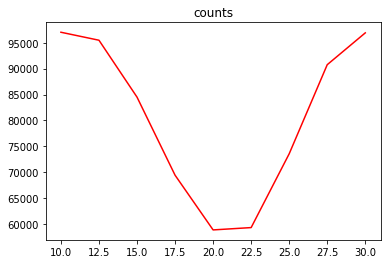

Mean of A: 80652.77777777778 , standard deviation: 14804.348188419192 , std as percent: 18.355658163702113
Mean of AG: 1986.888888888889 , standard deviation: 633.0823089271594 , std as percent: 31.862995080776393
minimum of A:  [58883]  at voltage  [20.]
maximum of A:  []  at voltage  []
minimum of AG:  [983]  at voltage  [22.5]
maximum of AG:  [2755]  at voltage  [12.5]


In [52]:
##Single Photon Interference Data Analysis Try 3, B blocked off
# 10 second data points
import matplotlib.pyplot as plt
import scipy as sp


voltage = [10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
A = [97016, 95475, 84503, 69442, 58883, 59333, 73570, 90757, 96896, ]
AG = [2525, 2755, 2557, 1924, 1239, 983, 1275, 2074, 2550, ]
runs = len(A)

#plt.scatter(voltage, AB, color='r')
plt.plot(voltage, AG, color='r')
#plt.plot(voltage, BG, color='b')
plt.title("coincidences")
plt.show()

plt.plot(voltage, A, color='r')
#plt.plot(voltage, B, color='b')
plt.title("counts")
plt.show()

print("Mean of A:", sp.mean(A), ", standard deviation:", sp.std(A), ", std as percent:", (100/sp.mean(A))*sp.std(A))
print("Mean of AG:", sp.mean(AG), ", standard deviation:", sp.std(AG), ", std as percent:", (100/sp.mean(AG))*sp.std(AG))


def minMax(stuff):
    a = sp.diff(sp.sign(sp.diff(stuff))).nonzero()[0] + 1 # local min+max
    b = (sp.diff(sp.sign(sp.diff(stuff))) > 0).nonzero()[0] + 1 # local min
    c = (sp.diff(sp.sign(sp.diff(stuff))) < 0).nonzero()[0] + 1 # local max
    return a,b,c

a,b,c = minMax(A)
A = sp.array(A)
voltage = sp.array(voltage)
print("minimum of A: ", A[b], " at voltage ", voltage[b])
print("maximum of A: ", A[c], " at voltage ", voltage[c])

AG = sp.array(AG)
a,b,c = minMax(AG)
print("minimum of AG: ", AG[b], " at voltage ", voltage[b])
print("maximum of AG: ", AG[c], " at voltage ", voltage[c])


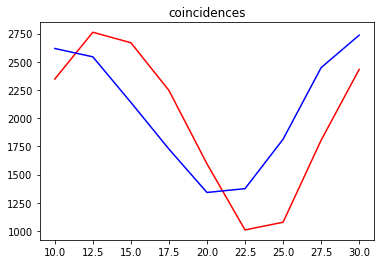

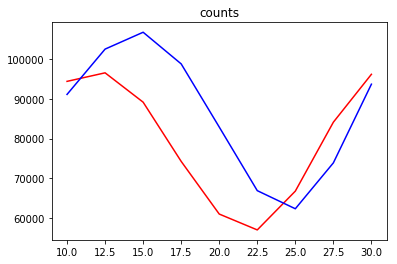

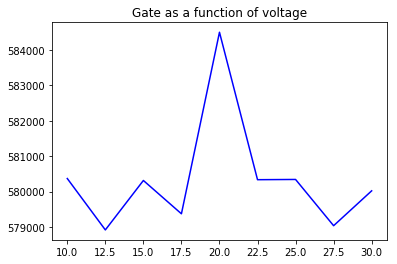

Mean of G: 580357.8888888889 , standard deviation: 1564.4789295441644 , std as percent: 0.26957140748778347
Mean of A: 79942.0 , standard deviation: 14702.70525372041 , std as percent: 18.39171556093219
Mean of AG: 1993.4444444444443 , standard deviation: 617.5055755233868 , std as percent: 30.976813888358965
minimum of A:  [56987]  at voltage  [22.5]
maximum of A:  [96570]  at voltage  [12.5]
minimum of AG:  [1009]  at voltage  [22.5]
maximum of AG:  [2762]  at voltage  [12.5]
minimum of B:  [62318]  at voltage  [25.]
maximum of B:  [106797]  at voltage  [15.]
minimum of BG:  [82916]  at voltage  [20.]
maximum of BG:  []  at voltage  []


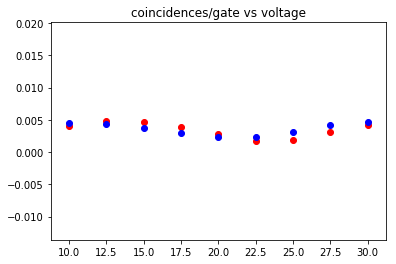

In [53]:
##Single Photon Interference Data Analysis Try 4, B no longer blocked off
# 10 second data points
import matplotlib.pyplot as plt
import scipy as sp


voltage = [10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
A = [94419, 96570, 89175, 74254, 60986, 56987, 66759, 84130, 96198, ]
B = [91133, 102548, 106797, 98821, 82916, 66882, 62318, 73881, 93707, ]
G = [580370, 578920, 580315, 579375, 584498, 580337, 580344, 579039, 580023, ]
AB = [10, 6, 8, 7, 1, 3, 2, 4, 7, ]
AG = [2347, 2762, 2669, 2246, 1595, 1009, 1077, 1804, 2432, ]
BG = [2618, 2544, 2140, 1726, 1341, 1375, 1813, 2448, 2736, ]
ABG = [0, 0, 0, 0, 0, 0, 1, 0, 0, ]
runs = len(A)

#plt.scatter(voltage, AB, color='r')
plt.plot(voltage, AG, color='r')
plt.plot(voltage, BG, color='b')
plt.title("coincidences")
plt.show()

plt.plot(voltage, A, color='r')
plt.plot(voltage, B, color='b')
plt.title("counts")
plt.show()

plt.plot(voltage, G, color='b')
plt.title("Gate as a function of voltage")
plt.show()

print("Mean of G:", sp.mean(G), ", standard deviation:", sp.std(G), ", std as percent:", (100/sp.mean(G))*sp.std(G))
print("Mean of A:", sp.mean(A), ", standard deviation:", sp.std(A), ", std as percent:", (100/sp.mean(A))*sp.std(A))
print("Mean of AG:", sp.mean(AG), ", standard deviation:", sp.std(AG), ", std as percent:", (100/sp.mean(AG))*sp.std(AG))


def minMax(stuff):
    a = sp.diff(sp.sign(sp.diff(stuff))).nonzero()[0] + 1 # local min+max
    b = (sp.diff(sp.sign(sp.diff(stuff))) > 0).nonzero()[0] + 1 # local min
    c = (sp.diff(sp.sign(sp.diff(stuff))) < 0).nonzero()[0] + 1 # local max
    return a,b,c

a,b,c = minMax(A)
A = sp.array(A)
voltage = sp.array(voltage)
print("minimum of A: ", A[b], " at voltage ", voltage[b])
print("maximum of A: ", A[c], " at voltage ", voltage[c])

AG = sp.array(AG)
a,b,c = minMax(AG)
print("minimum of AG: ", AG[b], " at voltage ", voltage[b])
print("maximum of AG: ", AG[c], " at voltage ", voltage[c])

B = sp.array(B)
a,b,c = minMax(B)
print("minimum of B: ", B[b], " at voltage ", voltage[b])
print("maximum of B: ", B[c], " at voltage ", voltage[c])

BG = sp.array(BG)
a,b,c = minMax(BG)
print("minimum of BG: ", B[b], " at voltage ", voltage[b])
print("maximum of BG: ", B[c], " at voltage ", voltage[c])


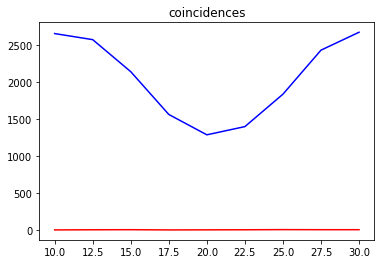

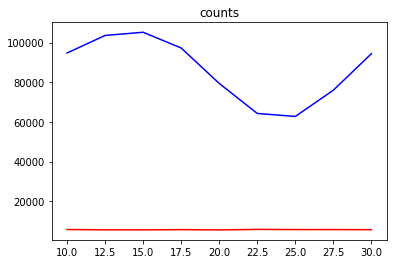

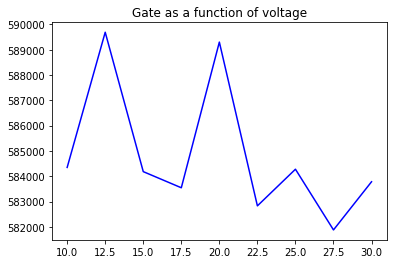

Mean of G: 584871.8888888889 , standard deviation: 2580.8960306427794 , std as percent: 0.44127544504589544
Mean of A: 5671.111111111111 , standard deviation: 84.28713417630428 , std as percent: 1.486254325209127
Mean of AG: 2.0 , standard deviation: 1.3333333333333333 , std as percent: 66.66666666666666
minimum of A:  [5567 5547]  at voltage  [15. 20.]
maximum of A:  [5687 5809]  at voltage  [17.5 22.5]
minimum of AG:  [0 3]  at voltage  [17.5 27.5]
maximum of AG:  [3 4]  at voltage  [15. 25.]
minimum of B:  [62746]  at voltage  [25.]
maximum of B:  [105179]  at voltage  [15.]
minimum of BG:  [79383]  at voltage  [20.]
maximum of BG:  []  at voltage  []


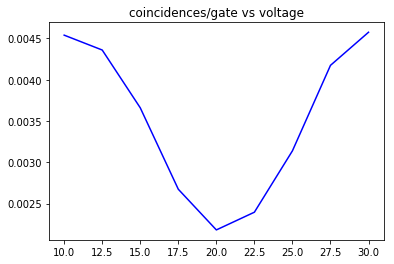

In [57]:
##Single Photon Interference Data Analysis Try 4, A blocked off
# 10 second data points
import matplotlib.pyplot as plt
import scipy as sp


voltage = [10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
A = [5747, 5585, 5567, 5687, 5547, 5809, 5726, 5716, 5656]
B = [94721, 103555, 105179, 97233, 79383, 64249, 62746, 75970, 94379, ]
G = [584350, 589689, 584184, 583547, 589300, 582832, 584279, 581882, 583784, ]
AG = [0 , 2, 3, 0, 1, 2, 4, 3, 3, ]
BG = [2653, 2571, 2138, 1560, 1285, 1396, 1834, 2429, 2671, ]
runs = len(A)

#plt.scatter(voltage, AB, color='r')
plt.plot(voltage, AG, color='r')
plt.plot(voltage, BG, color='b')
plt.title("coincidences")
plt.show()

plt.plot(voltage, A, color='r')
plt.plot(voltage, B, color='b')
plt.title("counts")
plt.show()

plt.plot(voltage, G, color='b')
plt.title("Gate as a function of voltage")
plt.show()

print("Mean of G:", sp.mean(G), ", standard deviation:", sp.std(G), ", std as percent:", (100/sp.mean(G))*sp.std(G))
print("Mean of A:", sp.mean(A), ", standard deviation:", sp.std(A), ", std as percent:", (100/sp.mean(A))*sp.std(A))
print("Mean of AG:", sp.mean(AG), ", standard deviation:", sp.std(AG), ", std as percent:", (100/sp.mean(AG))*sp.std(AG))


def minMax(stuff):
    a = sp.diff(sp.sign(sp.diff(stuff))).nonzero()[0] + 1 # local min+max
    b = (sp.diff(sp.sign(sp.diff(stuff))) > 0).nonzero()[0] + 1 # local min
    c = (sp.diff(sp.sign(sp.diff(stuff))) < 0).nonzero()[0] + 1 # local max
    return a,b,c

a,b,c = minMax(A)
A = sp.array(A)
voltage = sp.array(voltage)
print("minimum of A: ", A[b], " at voltage ", voltage[b])
print("maximum of A: ", A[c], " at voltage ", voltage[c])

AG = sp.array(AG)
a,b,c = minMax(AG)
print("minimum of AG: ", AG[b], " at voltage ", voltage[b])
print("maximum of AG: ", AG[c], " at voltage ", voltage[c])

B = sp.array(B)
a,b,c = minMax(B)
print("minimum of B: ", B[b], " at voltage ", voltage[b])
print("maximum of B: ", B[c], " at voltage ", voltage[c])

BG = sp.array(BG)
a,b,c = minMax(BG)
print("minimum of BG: ", B[b], " at voltage ", voltage[b])
print("maximum of BG: ", B[c], " at voltage ", voltage[c])

#plt.scatter(voltage, AB, color='r')
plt.plot(voltage, BG/G, color='b')
plt.title("coincidences/gate vs voltage")
plt.show()

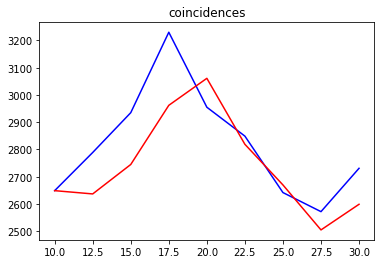

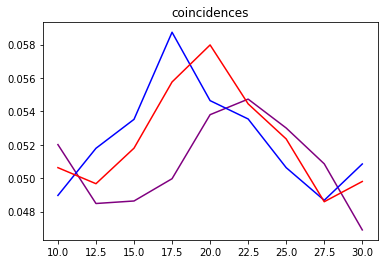

In [34]:
## Final Sweeping data for MZI
## 10 second trials, from 10V to 30V
voltage = [10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]

## Position 1 data
A1 = sp.array([57068, 56785, 58069, 60201, 61116, 59947, 59093, 58182, 58252])
B1 = sp.array([99715, 99520, 100810, 103722, 105764, 104685, 103685, 101623, 101293])
G1 = sp.array([598672, 594883, 596556, 595787, 595254, 594287, 595154, 599639, 593692])
AG1= sp.array([2968, 2753, 2824, 3008, 3288, 3281, 3132, 2959, 2732])
BG1= sp.array([5946, 5864, 6037, 6437, 6865, 6660, 6501, 5975, 5985])

## Position 2 data
A2 = sp.array([57802, 58762, 57833, 56976, 56960, 56650, 59053, 57247, 59169])
B2 = sp.array([91064, 92090, 91846, 92958, 93227, 92496, 99261, 96790, 98252])
G2 = sp.array([591055, 599146, 596236, 596385, 597002, 593181, 595819, 593073, 595644])
AG2= sp.array([2967, 3039, 3075, 2932, 2992, 2897, 3002, 2899, 3070])
BG2= sp.array([5642, 5672, 5717, 5777, 5808, 5814, 6163, 6166, 6259])

## Position 3 data ##not worth adding, we know nothing changes
A3 = sp.array([])
B3 = sp.array([])
G3 = sp.array([])
AG3= sp.array([])
BG3= sp.array([])

## Position 4 data
A4 = sp.array([51525, 52223, 51827, 52039, 52367, 52382, 50733, 51415, 52279])
B4 = sp.array([103931, 104293, 103807, 104672, 103045, 104832, 102864, 103827, 104479])
G4 = sp.array([583278, 595022, 593794, 594219, 592684, 594240, 590328, 591921, 597785])
AG4= sp.array([2728, 2793, 2732, 2772, 2767, 2747, 2725, 2747, 2793])
BG4= sp.array([6539, 6629, 6477, 6655, 6448, 6518, 6572, 6623, 6619])

## Position 5(actually just pulse lengthened, 18 or 42 ns, position 1) data
A5 = sp.array([54100, 53855, 54839, 54992, 54080, 53210, 52185, 52841, 53709])
B5 = sp.array([87214, 88064, 89528, 89859, 89648, 88348, 86654, 86753, 87405])
G5 = sp.array([548589, 548777, 547896, 548564, 547920, 548359, 546710, 545918, 546296])
AG5= sp.array([2649, 2789, 2935, 3230, 2955, 2849, 2642, 2572, 2731])
BG5= sp.array([5255, 5502, 5878, 5838, 5810, 5482, 5256, 5235, 5330])

## Position 6(actually just 8ns pulse length at position 1) data
A6 = sp.array([52323, 53094, 52998, 53122, 52798, 51775, 51006, 51556, 52189])
B6 = sp.array([86908, 87420, 88062, 88971, 88550, 87174, 86462, 85998, 86154])
G6 = sp.array([536826, 532859, 533056, 532514, 531720, 532563, 532845, 531573, 533056])
AG6= sp.array([2649, 2637, 2745, 2962, 3061, 2819, 2670, 2505, 2599])
BG6= sp.array([5407, 5469, 5587, 5958, 5677, 5332, 5143, 5266, 5264])

plt.plot(voltage, AG5, color='b')
plt.plot(voltage, AG6, color='r', label='8ns')
plt.title("coincidences")
plt.show()

plt.plot(voltage, AG1/A1, color='purple')
plt.plot(voltage, AG5/A5, color='b')
plt.plot(voltage, AG6/A6, color='r', label='8ns')
plt.title("coincidences")
plt.show()